In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
grades= pd.read_csv('/Users/cesurdagli/Desktop/AIM_Madison/CourseGrades.csv')
print(grades.shape)
grades.head()

(15900, 4)


,STU_NUM,SEMESTER,CREDITS_TAKEN,OFFICIAL_GRADE
0,3647,20101,3,A
1,195208,20101,3,B
2,11323,20101,3,C
3,972396,20101,3,AB
4,322830,20101,3,AB


# Characterize the grade distribution and rate of course drops before and after the scale change.

In [3]:
#Excluding Summer 2011 and 2012 as the curve grade scale was not used.
grades=grades[(grades['SEMESTER']!=20113) & (grades['SEMESTER']!=20123)]
grades=grades.reset_index(drop=True)
grades.shape

(15791, 4)

In [4]:
# Creating a new varible to determine the scale change: Before and After Change
grades['CHANGE']=["Before" if grades['SEMESTER'][x]<20131  else "After" for x in range(len(grades)) ]
grades.head()

,STU_NUM,SEMESTER,CREDITS_TAKEN,OFFICIAL_GRADE,CHANGE
0,3647,20101,3,A,Before
1,195208,20101,3,B,Before
2,11323,20101,3,C,Before
3,972396,20101,3,AB,Before
4,322830,20101,3,AB,Before


In [5]:
# Excluiding those with grades: W, S, U, and NW from the dataset
grades=grades[(grades['OFFICIAL_GRADE']!='W') & (grades['OFFICIAL_GRADE']!='S') & (grades['OFFICIAL_GRADE']!='U') & (grades['OFFICIAL_GRADE']!='NW')]
grades.shape

(15772, 5)

In [6]:
grades.groupby('CHANGE')['OFFICIAL_GRADE'].describe()

,count,unique,top,freq
CHANGE,,,,
After,8219,8,A,2655
Before,7552,8,BC,1516


Text(0.5, 6.800000000000029, 'Grades')

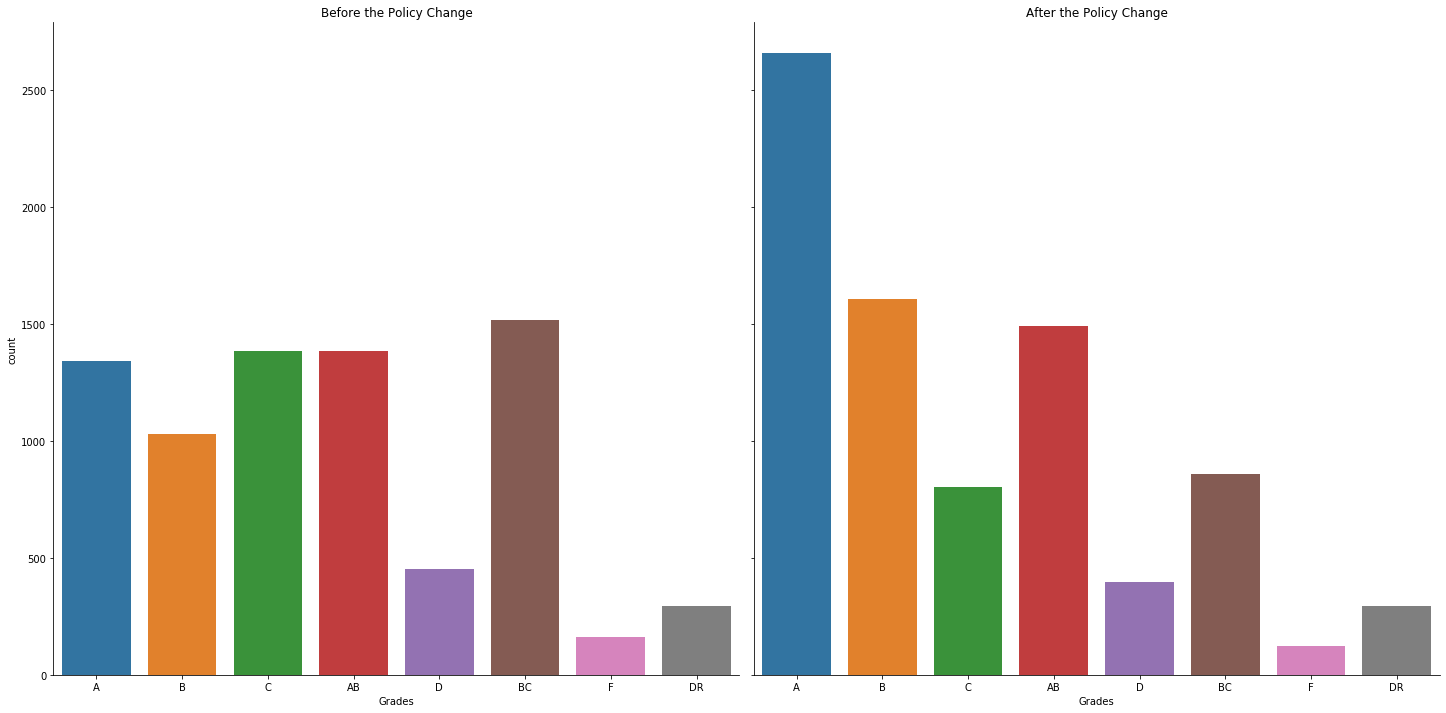

In [7]:
g=sns.catplot(x="OFFICIAL_GRADE", data=grades, kind="count", col='CHANGE', height=10, aspect=1)

axes = g.axes.flatten()
axes[0].set_title("Before the Policy Change")
axes[0].set_xlabel("Grades")

axes[1].set_title("After the Policy Change")
axes[1].set_xlabel("Grades")



# Characterize the achievement gap between underrepresented students and majority students both before and after the scale change. 

This concept is not necessarily straightforward, so you may want to spend a bit of time thinking about how the gap should be defined.

In [8]:
# Loading student demographic data into dataframe
students= pd.read_csv('/Users/cesurdagli/Desktop/AIM_Madison/StudentData.csv')
print(students.shape)
students.head()

(20924, 5)


,STU_NUM,VERBAL,QUANT,GENDER,UNDERREP
0,927471,835.0,NaN,M,NaN
1,301942,901.0,NaN,F,NaN
2,691800,870.0,NaN,F,NaN
3,852153,878.0,NaN,F,NaN
4,121668,1022.0,NaN,F,NaN


In [9]:
# Combining grades and student dataframes using STU_NUM as key element

student_grades=pd.merge(grades,students, how='left', on='STU_NUM')
print(student_grades.shape)
student_grades.head()

(15772, 9)


,STU_NUM,SEMESTER,CREDITS_TAKEN,OFFICIAL_GRADE,CHANGE,VERBAL,QUANT,GENDER,UNDERREP
0,3647,20101,3,A,Before,785.0,845.0,M,NaN
1,195208,20101,3,B,Before,905.0,835.0,M,NaN
2,11323,20101,3,C,Before,815.0,845.0,F,NaN
3,972396,20101,3,AB,Before,765.0,805.0,F,NaN
4,322830,20101,3,AB,Before,835.0,715.0,F,NaN


In [10]:
# Replacing all null values with N for UNDERREP
student_grades['UNDERREP']=student_grades['UNDERREP'].fillna('N')

In [11]:
# replacing letter numbers with numerical numbers

student_grades['GRADE']= student_grades['OFFICIAL_GRADE'].replace({'A':4, 'AB':3.5, 'B':3, 'BC':2.5, 'C':2, 'D':1, 'F':0, 'DR':10})
student_grades.head()

,STU_NUM,SEMESTER,CREDITS_TAKEN,OFFICIAL_GRADE,CHANGE,VERBAL,QUANT,GENDER,UNDERREP,GRADE
0,3647,20101,3,A,Before,785.0,845.0,M,N,4.0
1,195208,20101,3,B,Before,905.0,835.0,M,N,3.0
2,11323,20101,3,C,Before,815.0,845.0,F,N,2.0
3,972396,20101,3,AB,Before,765.0,805.0,F,N,3.5
4,322830,20101,3,AB,Before,835.0,715.0,F,N,3.5


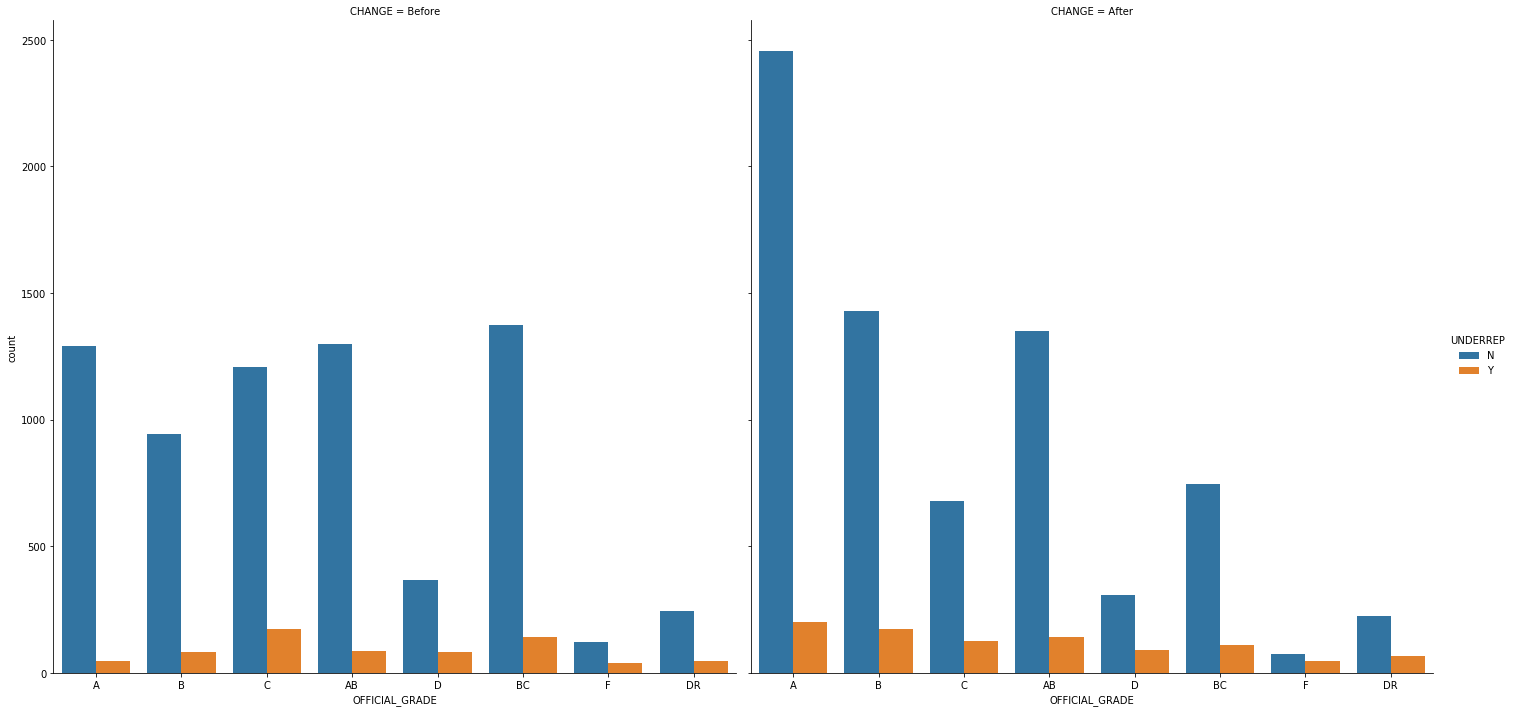

In [12]:
sns.catplot(x="OFFICIAL_GRADE", hue="UNDERREP", col="CHANGE",
           data=student_grades, kind="count",
                 height=10, aspect=1)

/Users/cesurdagli/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:60: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


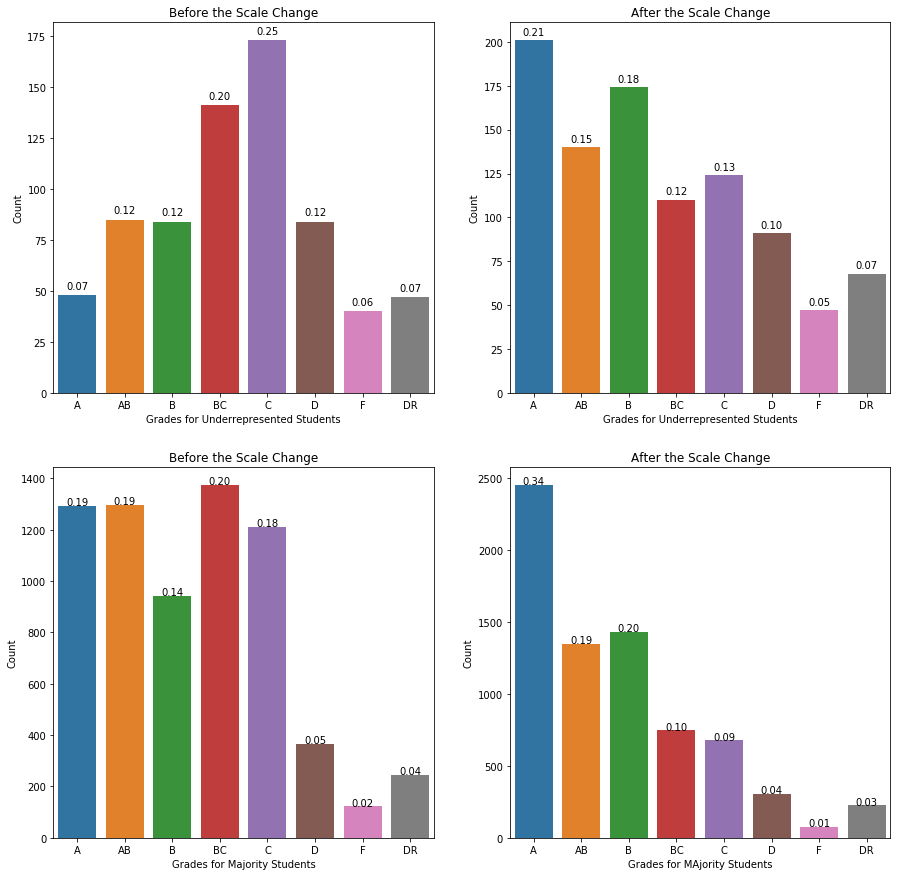

In [13]:


fig, axarr =plt.subplots(2,2, figsize=(15, 15))


total = float(len(student_grades[(student_grades['UNDERREP']=='Y') & (student_grades['CHANGE']=='Before')])) 

ax = sns.countplot(x="OFFICIAL_GRADE", data=student_grades[(student_grades['UNDERREP']=='Y') & (student_grades['CHANGE']=='Before')], ax=axarr[0,0], order=['A','AB','B','BC','C','D','F', 'DR'])
ax.set_title('Before the Scale Change')
ax.set_xlabel('Grades for Underrepresented Students')
ax.set_ylabel('Count')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
    
    
total1 = float(len(student_grades[(student_grades['UNDERREP']=='Y') & (student_grades['CHANGE']=='After')])) 

ax = sns.countplot(x="OFFICIAL_GRADE", data=student_grades[(student_grades['UNDERREP']=='Y') & (student_grades['CHANGE']=='After')], ax=axarr[0,1], order=['A','AB','B','BC','C','D','F', 'DR'])
ax.set_title('After the Scale Change')
ax.set_xlabel('Grades for Underrepresented Students')
ax.set_ylabel('Count')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total1),
            ha="center") 
    
total2 = float(len(student_grades[(student_grades['UNDERREP']=='N') & (student_grades['CHANGE']=='Before')])) 


ax = sns.countplot(x="OFFICIAL_GRADE", data=student_grades[(student_grades['UNDERREP']=='N') & (student_grades['CHANGE']=='Before')], ax=axarr[1,0], order=['A','AB','B','BC','C','D','F', 'DR'])
ax.set_title('Before the Scale Change')
ax.set_xlabel('Grades for Majority Students')
ax.set_ylabel('Count')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total2),
            ha="center") 
    
    
total3 = float(len(student_grades[(student_grades['UNDERREP']=='N') & (student_grades['CHANGE']=='After')])) 

ax = sns.countplot(x="OFFICIAL_GRADE", data=student_grades[(student_grades['UNDERREP']=='N') & (student_grades['CHANGE']=='After')], ax=axarr[1,1], order=['A','AB','B','BC','C','D','F', 'DR'])
ax.set_title('After the Scale Change')
ax.set_xlabel('Grades for MAjority Students')
ax.set_ylabel('Count')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total3),
            ha="center") 
fig.show()

In [14]:
# Calculating mean scores for each group using the grades A to F

ag=student_grades[student_grades['OFFICIAL_GRADE']!='DR']
ag.groupby(['CHANGE', 'UNDERREP'])['GRADE'].mean()


CHANGE  UNDERREP
After   N           3.176303
        Y           2.739572
Before  N           2.840500
        Y           2.326718
Name: GRADE, dtype: float64

# Discuss what student characteristics are associated with difficulty in the course and whether this changed after the scale change.

In [15]:
student_grades.shape

(15772, 10)

In [16]:
# Loading the Semester database
semester= pd.read_csv('/Users/cesurdagli/Desktop/AIM_Madison/SemesterData.csv')
print(semester.shape)
semester.head()

(158631, 4)


,STU_NUM,SEMESTER,Cumulative_CREDITS,Cumulative_GPA
0,852153,19922,96,2.112
1,294944,20122,110,2.691
2,952249,20122,100,3.259
3,654490,20122,73,3.850
4,965181,20122,80,2.502


In [17]:
# Combining student_grades and semester dataframes using STU_NUM and SEMESTER columns
final=pd.merge(student_grades, semester, how='left', on=['STU_NUM','SEMESTER'])
print(final.shape)
final.head()

(15772, 12)


,STU_NUM,SEMESTER,CREDITS_TAKEN,OFFICIAL_GRADE,CHANGE,VERBAL,QUANT,GENDER,UNDERREP,GRADE,Cumulative_CREDITS,Cumulative_GPA
0,3647,20101,3,A,Before,785.0,845.0,M,N,4.0,112,3.443
1,195208,20101,3,B,Before,905.0,835.0,M,N,3.0,140,3.311
2,11323,20101,3,C,Before,815.0,845.0,F,N,2.0,102,2.514
3,972396,20101,3,AB,Before,765.0,805.0,F,N,3.5,90,3.475
4,322830,20101,3,AB,Before,835.0,715.0,F,N,3.5,77,3.381


In [18]:
# Data Checkin

b=['SEMESTER', 'CREDITS_TAKEN', 'OFFICIAL_GRADE', 'GENDER', 'UNDERREP']
for a in b:
    print(a,':', final[a].value_counts())
    print('')

SEMESTER : 20151    1818
20141    1607
20131    1586
20101    1387
20111    1364
20121    1281
20132    1198
20112    1193
20102    1189
20122    1138
20142     997
20152     946
20133      40
20143      28
Name: SEMESTER, dtype: int64

CREDITS_TAKEN : 3    15658
4      112
6        1
0        1
Name: CREDITS_TAKEN, dtype: int64

OFFICIAL_GRADE : A     3995
AB    2873
B     2631
BC    2372
C     2184
D      847
DR     585
F      284
Name: OFFICIAL_GRADE, dtype: int64

GENDER : F    8188
M    7583
U       1
Name: GENDER, dtype: int64

UNDERREP : N    14115
Y     1657
Name: UNDERREP, dtype: int64



In [19]:
# Listing non-unique cases

final[final.duplicated(subset=['STU_NUM'],keep=False)].sort_values(by=['STU_NUM', 'SEMESTER'])

,STU_NUM,SEMESTER,CREDITS_TAKEN,OFFICIAL_GRADE,CHANGE,VERBAL,QUANT,GENDER,UNDERREP,GRADE,Cumulative_CREDITS,Cumulative_GPA
8328,1815,20121,3,F,Before,NaN,895.0,M,N,0.0,20,1.427
2852,1815,20122,3,F,Before,NaN,895.0,M,N,0.0,23,1.171
2111,4327,20101,3,F,Before,615.0,565.0,F,Y,0.0,6,0.150
8106,4327,20112,3,D,Before,615.0,565.0,F,Y,1.0,19,2.773
15477,9227,20141,3,DR,After,755.0,795.0,F,N,10.0,21,2.642
5406,9227,20142,3,BC,After,755.0,795.0,F,N,2.5,33,2.558
15356,10873,20122,3,DR,Before,735.0,605.0,F,Y,10.0,40,2.336
8525,10873,20131,3,F,After,735.0,605.0,F,Y,0.0,46,1.996
13287,16343,20101,3,C,Before,765.0,655.0,M,N,2.0,21,2.650
7919,16343,20111,3,AB,Before,765.0,655.0,M,N,3.5,50,3.236


In [20]:
# As can be seen, this course was taken multiple time by some of the students 
# Also, some of those cases are problematic. For instance, the student 33297 had two grades (A and DR) 
# for the 2013 Fall semester, which should not be a case.
#so I am excluding those who took the course more than once. 

print(final.shape)
# dropping ALL duplicte STU_NUM values
final= final.drop_duplicates(subset ="STU_NUM", keep = False)
final.shape

(15772, 12)


(15079, 12)

In [21]:
# Checking the student taking 6 credits
final[final['CREDITS_TAKEN']==6]

,STU_NUM,SEMESTER,CREDITS_TAKEN,OFFICIAL_GRADE,CHANGE,VERBAL,QUANT,GENDER,UNDERREP,GRADE,Cumulative_CREDITS,Cumulative_GPA
14037,484553,20122,6,A,Before,735.0,605.0,F,N,4.0,74,3.104


In [22]:
final[final['STU_NUM']==484553]

,STU_NUM,SEMESTER,CREDITS_TAKEN,OFFICIAL_GRADE,CHANGE,VERBAL,QUANT,GENDER,UNDERREP,GRADE,Cumulative_CREDITS,Cumulative_GPA
14037,484553,20122,6,A,Before,735.0,605.0,F,N,4.0,74,3.104


In [23]:
#Dropping the student with Gender U
print(final.shape)
final=final[final['GENDER']!='U']

# Reset index
final=final.reset_index(drop=True)
final.shape



(15079, 12)


(15078, 12)

In [24]:
# Checking the null values
final.isnull().sum()

STU_NUM                  0
SEMESTER                 0
CREDITS_TAKEN            0
OFFICIAL_GRADE           0
CHANGE                   0
VERBAL                1338
QUANT                   89
GENDER                   0
UNDERREP                 0
GRADE                    0
Cumulative_CREDITS       0
Cumulative_GPA          26
dtype: int64

# Discuss what student characteristics are associated with difficulty in the course and whether this changed after the scale change.

In [ ]:
# ANOVA
# Ordinary Least Squares (OLS) model
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [26]:
final.columns

Index(['STU_NUM', 'SEMESTER', 'CREDITS_TAKEN', 'OFFICIAL_GRADE', 'CHANGE',
       'VERBAL', 'QUANT', 'GENDER', 'UNDERREP', 'GRADE', 'Cumulative_CREDITS',
       'Cumulative_GPA'],
      dtype='object')

In [27]:
final['gender']=final['GENDER'].replace({'M':0, 'F':1}) # Male: 0, Female: 1
final['Rep']=final['UNDERREP'].replace({'N':0, 'Y':1}) # Majority:0 , Minority: 1
final=final[final['OFFICIAL_GRADE']!='DR']

In [28]:
# replacing letter numbers with numerical numbers

final['SEMESTER_NEW']= final['SEMESTER'].replace({20101:'Fall', 20102:'Spring', 
                                                  20111:'Fall', 20112:'Spring', 
                                                  20121:'Fall', 20122:'Spring',
                                                  20131:'Fall', 20132:'Spring', 20133:'Summer',
                                                 20141:'Fall', 20142:'Spring', 20143:'Summer',
                                                 20151:'Fall', 20152:'Spring'})
final['SEMESTER_New']= final['SEMESTER_NEW'].replace({'Fall':0, 'Spring':1, 'Summer':2 })
final.shape

(14711, 16)

In [46]:
# Creating a new variable for the credits taken prior to the semester in which the course was taken
final['Credits']= [final['Cumulative_CREDITS'][a] - final['CREDITS_TAKEN'][a] for a in range(len(final))]

In [48]:
# Creating a new variable for the GPA earned excluding this course
final['GPA']= [(final['Cumulative_GPA'][a] * final['Cumulative_CREDITS'][a] - (final['CREDITS_TAKEN'][a]* final['GRADE'][a]))/final['Credits'][a].round(2) for a in range(len(final))]
final['GPA']=final['GPA'].round(3)
final.head()

,STU_NUM,SEMESTER,CREDITS_TAKEN,OFFICIAL_GRADE,CHANGE,VERBAL,QUANT,GENDER,UNDERREP,GRADE,Cumulative_CREDITS,Cumulative_GPA,gender,Rep,SEMESTER_NEW,SEMESTER_New,Credits,GPA
0,3647,20101,3,A,Before,785.0,845.0,M,N,4.0,112,3.443,0,0,Fall,0,109,3.428
1,195208,20101,3,B,Before,905.0,835.0,M,N,3.0,140,3.311,0,0,Fall,0,137,3.318
2,11323,20101,3,C,Before,815.0,845.0,F,N,2.0,102,2.514,1,0,Fall,0,99,2.530
3,972396,20101,3,AB,Before,765.0,805.0,F,N,3.5,90,3.475,1,0,Fall,0,87,3.474
4,322830,20101,3,AB,Before,835.0,715.0,F,N,3.5,77,3.381,1,0,Fall,0,74,3.376


In [53]:
final.groupby(['CHANGE', 'SEMESTER_NEW'])['GRADE'].mean()

CHANGE  SEMESTER_NEW
After   Fall            3.129127
        Spring          3.195263
        Summer          2.577778
Before  Fall            2.770231
        Spring          2.918809
Name: GRADE, dtype: float64

In [43]:
final.groupby(['CHANGE', 'SEMESTER_NEW'])['VERBAL'].mean()

CHANGE  SEMESTER_NEW
After   Fall            810.140014
        Spring          808.356956
        Summer          765.888889
Before  Fall            801.439965
        Spring          800.033829
Name: VERBAL, dtype: float64

In [44]:
final.groupby(['CHANGE', 'SEMESTER_NEW'])['QUANT'].mean()

CHANGE  SEMESTER_NEW
After   Fall            738.652540
        Spring          744.053338
        Summer          705.000000
Before  Fall            734.161262
        Spring          751.556495
Name: QUANT, dtype: float64

In [45]:
final=final.reset_index(drop=True)

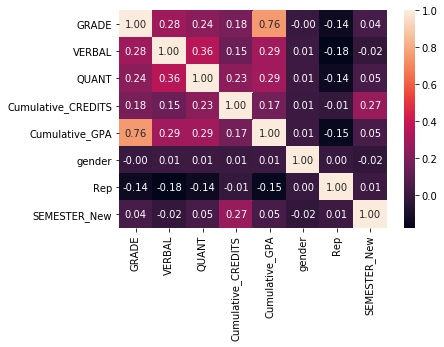

In [59]:
fn=final[["GRADE","VERBAL", "QUANT", "Cumulative_CREDITS", "Cumulative_GPA", "gender", "Rep", "SEMESTER_New"]]
# Correlation
sns.heatmap(fn.corr(), annot=True, fmt=".2f")

In [61]:
#T-Tests used to check whether or not the mean difference is significant between mean

import researchpy as rp
from scipy import stats

beforeGrade=final[final['CHANGE']=='Before']
afterGrade=final[final['CHANGE']=='After']


In [62]:
stats.levene(beforeGrade['GRADE'].dropna(), afterGrade['GRADE'].dropna())

#The test is significant meaning there is no homogeneity of variances and we can proceed so Welch test is used.

LeveneResult(statistic=26.0199752519859, pvalue=3.4252894553312166e-07)

In [63]:
# using researchpy

descriptives, results = rp.ttest(beforeGrade['GRADE'].dropna(), afterGrade['GRADE'].dropna(), equal_variances= False)

descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,GRADE,6379.0,2.839081,0.900556,0.011275,2.816978,2.861185
1,GRADE,6997.0,3.150922,0.879994,0.010520,3.130299,3.171545
2,combined,13376.0,3.002205,0.903356,0.007811,2.986895,3.017516


In [64]:
results

,Welch's t-test,results
0,Difference (GRADE - GRADE) =,-0.3118
1,Degrees of freedom =,13197.7728
2,t =,-20.2217
3,Two side test p value =,0.0000
4,Difference < 0 p value =,0.0000
5,Difference > 0 p value =,1.0000
6,Cohen's d =,-0.3501
7,Hedge's g =,-0.3500
8,Glass's delta =,-0.3463
9,r =,0.1734


In [66]:
#T-tests for Majority groups
MajorityBeforeGrade=final[(final['CHANGE']=='Before') & (final['UNDERREP']=='N')]
MajorityAfterGrade=final[(final['CHANGE']=='After') & (final['UNDERREP']=='N')]
stats.levene(MajorityBeforeGrade['GRADE'].dropna(), MajorityAfterGrade['GRADE'].dropna())

LeveneResult(statistic=46.612115727701266, pvalue=9.070596355278954e-12)

In [67]:
descriptives, results = rp.ttest(MajorityBeforeGrade['GRADE'].dropna(), MajorityAfterGrade['GRADE'].dropna(), equal_variances= False)
descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,GRADE,5780.0,2.883824,0.880784,0.011585,2.861112,2.906535
1,GRADE,6187.0,3.197268,0.838762,0.010663,3.176364,3.218173
2,combined,11967.0,3.045876,0.873439,0.007984,3.030226,3.061527


In [68]:
results

,Welch's t-test,results
0,Difference (GRADE - GRADE) =,-0.3134
1,Degrees of freedom =,11803.9588
2,t =,-19.9067
3,Two side test p value =,0.0000
4,Difference < 0 p value =,0.0000
5,Difference > 0 p value =,1.0000
6,Cohen's d =,-0.3642
7,Hedge's g =,-0.3641
8,Glass's delta =,-0.3559
9,r =,0.1802


In [69]:
# T-Test for Underrepresented Students
MinorityBeforeGrade=final[(final['CHANGE']=='Before') & (final['UNDERREP']=='Y')]
MinorityAfterGrade=final[(final['CHANGE']=='After') & (final['UNDERREP']=='Y')]
stats.levene(MinorityBeforeGrade['GRADE'].dropna(), MinorityAfterGrade['GRADE'].dropna())


LeveneResult(statistic=6.792397380810893, pvalue=0.009251354576509507)

In [70]:
descriptives, results = rp.ttest(MinorityBeforeGrade['GRADE'].dropna(), MinorityAfterGrade['GRADE'].dropna(), equal_variances= False)
descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,GRADE,599.0,2.407346,0.972969,0.039754,2.329270,2.485421
1,GRADE,810.0,2.796914,1.084127,0.038092,2.722142,2.871685
2,combined,1409.0,2.631299,1.055697,0.028124,2.576129,2.686469


In [71]:
results

,Welch's t-test,results
0,Difference (GRADE - GRADE) =,-0.3896
1,Degrees of freedom =,1355.5348
2,t =,-7.0755
3,Two side test p value =,0.0000
4,Difference < 0 p value =,0.0000
5,Difference > 0 p value =,1.0000
6,Cohen's d =,-0.3813
7,Hedge's g =,-0.3811
8,Glass's delta =,-0.4004
9,r =,0.1887


In [72]:
# testing significant difference between minority and majority students after the scale change
descriptives, results = rp.ttest(MinorityAfterGrade['GRADE'].dropna(), MajorityAfterGrade['GRADE'].dropna(), equal_variances= False)
descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,GRADE,810.0,2.796914,1.084127,0.038092,2.722142,2.871685
1,GRADE,6187.0,3.197268,0.838762,0.010663,3.176364,3.218173
2,combined,6997.0,3.150922,0.879994,0.010520,3.130299,3.171545


In [73]:
results

,Welch's t-test,results
0,Difference (GRADE - GRADE) =,-0.4004
1,Degrees of freedom =,940.0078
2,t =,-10.1210
3,Two side test p value =,0.0000
4,Difference < 0 p value =,0.0000
5,Difference > 0 p value =,1.0000
6,Cohen's d =,-0.3782
7,Hedge's g =,-0.3781
8,Glass's delta =,-0.3693
9,r =,0.3135


In [56]:
#ANOVA

model = ols('GRADE ~ C(GENDER) + C(UNDERREP) + C(SEMESTER_NEW) +C(GENDER):C(UNDERREP) +C(GENDER):C(SEMESTER_NEW) +C(UNDERREP):C(SEMESTER_NEW)', data=final).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(GENDER),0.041932,1.0,0.052543,8.187002e-01
C(UNDERREP),211.667566,1.0,265.225518,4.610505e-59
C(SEMESTER_NEW),25.387433,2.0,15.905590,1.260367e-07
C(GENDER):C(UNDERREP),0.000294,1.0,0.000368,9.846896e-01
C(GENDER):C(SEMESTER_NEW),1.388505,2.0,0.869918,4.190096e-01
C(UNDERREP):C(SEMESTER_NEW),3.053061,2.0,1.912786,1.477088e-01
Residual,10666.955091,13366.0,NaN,NaN


In [49]:
X = final[["VERBAL", "QUANT", "Cumulative_CREDITS", "Cumulative_GPA", "gender", "Rep", "SEMESTER_New"]]
y = final["GRADE"]

X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  GRADE   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     2616.
Date:                Sat, 18 Apr 2020   Prob (F-statistic):               0.00
Time:                        16:09:46   Log-Likelihood:                -11849.
No. Observations:               13376   AIC:                         2.371e+04
Df Residuals:                   13368   BIC:                         2.377e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.3024      0.055    -23.552      0.000      -1.411      -1.194
VERBAL                 0.0007   6.71e-05      9.874      0.000       0.001       0.001
QUANT              -7.551e-05   5.04e-05     -1.500      0.134      -0.000    2.32e-05
Cumulative_CREDITS     0.0020      0.000      9.174      0.000       0.002       0.002
Cumulative_GPA         1.2306      0.010    120.107      0.000       1.211       1.251
gender                -0.0201      0.010     -1.982      0.047      -0.040      -0.000
Rep                   -0.0590      0.017     -3.482      0.000      -0.092      -0.026
SEMESTER_New          -0.0158      0.011     -1.498      0.134      -0.036       0.005
==============================================================================
Omnibus:                      526.503   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              826.679
Skew:                          -0.361   Prob(JB):                    3.08e-180
Kurtosis:                       3.981   Cond. No.                     1.21e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
X = final[final['CHANGE']=='Before'][["VERBAL", "QUANT", "Credits", "GPA", "gender", "Rep", "SEMESTER_New"]]
y = final[final['CHANGE']=='Before']["GRADE"]

X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  GRADE   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     939.9
Date:                Sat, 18 Apr 2020   Prob (F-statistic):               0.00
Time:                        19:24:45   Log-Likelihood:                -6120.2
No. Observations:                6379   AIC:                         1.226e+04
Df Residuals:                    6371   BIC:                         1.231e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.5675      0.087    -17.961      0.000      -1.739      -1.396
VERBAL           0.0012      0.000     10.995      0.000       0.001       0.001
QUANT         4.778e-05    7.9e-05      0.605      0.545      -0.000       0.000
Credits          0.0023      0.000      6.778      0.000       0.002       0.003
GPA              1.0979      0.016     68.244      0.000       1.066       1.129
gender          -0.0164      0.016     -1.037      0.300      -0.048       0.015
Rep             -0.0989      0.028     -3.566      0.000      -0.153      -0.045
SEMESTER_New     0.0411      0.017      2.482      0.013       0.009       0.074
==============================================================================
Omnibus:                      239.764   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              313.649
Skew:                          -0.403   Prob(JB):                     7.80e-69
Kurtosis:                       3.727   Cond. No.                     1.22e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
X = final[final['CHANGE']=='After'][["VERBAL", "QUANT", "Credits", "GPA", "gender", "Rep", "SEMESTER_New"]]
y = final[final['CHANGE']=='After']["GRADE"]

X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  GRADE   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     915.0
Date:                Sat, 18 Apr 2020   Prob (F-statistic):               0.00
Time:                        19:25:26   Log-Likelihood:                -6757.6
No. Observations:                6997   AIC:                         1.353e+04
Df Residuals:                    6989   BIC:                         1.359e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.8848      0.083    -10.618      0.000      -1.048      -0.721
VERBAL           0.0005   9.79e-05      5.539      0.000       0.000       0.001
QUANT         8.536e-05   7.53e-05      1.133      0.257   -6.23e-05       0.000
Credits          0.0025      0.000      7.778      0.000       0.002       0.003
GPA              1.1165      0.016     70.577      0.000       1.086       1.148
gender          -0.0199      0.015     -1.308      0.191      -0.050       0.010
Rep             -0.1147      0.024     -4.696      0.000      -0.163      -0.067
SEMESTER_New    -0.0279      0.016     -1.770      0.077      -0.059       0.003
==============================================================================
Omnibus:                      615.496   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1058.715
Skew:                          -0.634   Prob(JB):                    1.27e-230
Kurtosis:                       4.423   Cond. No.                     1.22e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""